## Conifuration

In [1]:
#import the lib for contrastive learning framework
!pip install lightly
!pip install ml_collections
!pip install tqdm
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 459 kB 7.4 MB/s 
     |████████████████████████████████| 151 kB 70.5 MB/s 
     |████████████████████████████████| 585 kB 49.0 MB/s 
     |████████████████████████████████| 117 kB 59.3 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 596 kB 52.7 MB/s 
     |████████████████████████████████| 419 kB 52.7 MB/s 
     |████████████████████████████████| 140 kB 56.6 MB/s 
     |████████████████████████████████| 1.1 MB 49.3 MB/s 
     |████████████████████████████████| 271 kB 58.0 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 15.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=63aa7491bb7e80e498a93ed94ca6535fbebc310e19f8e2621bccef0e427c2be2
  Stored in directory: /roo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.4 MB/s 
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=965e3ea33893a4dce4fcce4b10c85478a796c93a39e42f713bc5d75ad51d2f30
  Stored in directory: /root/.cache/pip/wheels/b7/da/64/33c926a1b10ff19791081b705879561b715a8341a856a3bbd2
Successfully built ml-collections
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import lightly
from lightly.models.modules.heads import SimSiamPredictionHead
from lightly.models.modules.heads import SimSiamProjectionHead

from lightly.data import LightlyDataset
from lightly.data import ImageCollateFunction
from lightly.models.modules import BarlowTwinsProjectionHead
from lightly.loss import BarlowTwinsLoss

from lightly.data import LightlyDataset
from lightly.data import SimCLRCollateFunction
from lightly.loss import NTXentLoss
from lightly.loss import NegativeCosineSimilarity
from lightly.models.modules import SimCLRProjectionHead

import math
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from torch.utils.data import Dataset, DataLoader
import torch.optim as torch_optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from datetime import datetime

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
import seaborn as sns

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering

import tensorboard
from tensorboard import notebook
from torch.utils.tensorboard import SummaryWriter

import matplotlib 
import matplotlib.pyplot as plt
#import plotly.express as px

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.utils import shuffle

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from sklearn.metrics.pairwise import cosine_similarity

import random
from torch.nn.modules.loss import MSELoss
from sklearn.neighbors import KDTree
#from kmodes.kprototypes import KPrototypes

from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import make_classification

import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import torch.nn as nn
from torch.nn import CrossEntropyLoss, Dropout, Softmax, Linear, Conv2d, LayerNorm
from torch.nn.modules.utils import _pair
from torch.optim.lr_scheduler import LambdaLR

import numpy as np
import random
from scipy import ndimage
import ml_collections
import copy
from os.path import join as pjoin
import math
from tqdm import tqdm

import numpy as np
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

## Load Dataset Pendigits and Check Clustering Result with the Baseline Method Kmeans

In [3]:
# set the path to the dataset
path_to_data = '/content/drive/MyDrive/Colab_Notebooks/pendigits.csv'

In [4]:
data = pd.read_csv(path_to_data)

X_ds = data.copy()
X_ds = X_ds.drop(['class'], axis=1)
X_ds = pd.DataFrame(X_ds).to_numpy()

y_ds = data.copy()
y_ds = y_ds['class']

In [5]:
#check the clustering result with Kmeans
kmeans_ori = KMeans(n_clusters=10).fit(X_ds)
kmeans_labels_ori = kmeans_ori.labels_

normalized_mutual_info_score(kmeans_labels_ori, y_ds)

0.6806516857328494

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


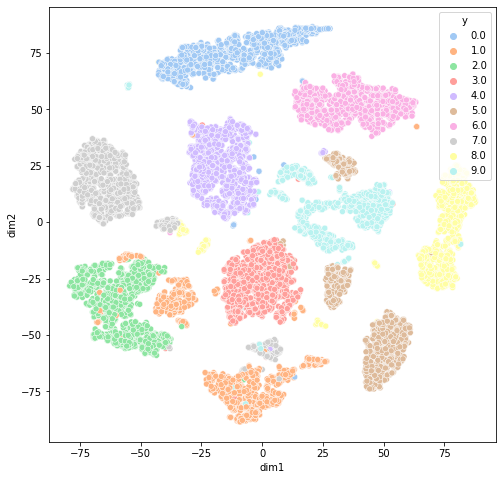

In [6]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_ds)
data_X_tsne = np.vstack((X_tsne.T, y_ds)).T
df_tsne = pd.DataFrame(data_X_tsne, columns=['dim1', 'dim2', 'y'])
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_tsne, hue='y', x='dim1', y='dim2', palette='pastel')
plt.show()

## Data Augmentation

#### Masking with mean

In [7]:
def get_random_indices(data, portion_of_mask):
  return np.random.choice(data.shape[1], size=np.floor(data.shape[1]*portion_of_mask).astype(int), replace=False)

In [8]:
def masking_with_mean(data, portion_of_mask):
  mean = np.mean(data, axis=0)
  column_mu = np.mean(data, axis=0)
  column_std = np.std(data, axis=0)

  view = data.copy()

  for i in range(len(data)): 
    masked_indices = get_random_indices(data, portion_of_mask)
   
    for j in range(len(mean)):
      if j in masked_indices:
        view[i,j] = column_mu[j]
              
  return view

In [9]:
class MyDataSet(Dataset):
  def __init__(self, view1, view2):
 
    X_view1 = view1.copy()
    X_view2 = view2.copy()
    self.X_view1 = X_view1.copy().astype(np.float32)
    self.X_view2 = X_view2.copy().astype(np.float32)
  
  def __len__(self):
    return len(self.X_view1)
  
  def __getitem__(self, idx):
    return self.X_view1[idx], self.X_view2[idx]

In [10]:
view1 = masking_with_mean(X_ds, 0.25)
view2 = masking_with_mean(X_ds, 0.25)

In [11]:
view1 = np.reshape(view1, (10992,1,4,4))
view2 = np.reshape(view2, (10992,1,4,4))

In [12]:
train_ds = MyDataSet(view1, view2)
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)

##Create Model and Train with Augmented Data
[source code ViT: https://github.com/lucidrains/vit-pytorch/blob/main/vit_pytorch/simple_vit.py]

In [13]:
#help functions
def pair(t):
    return t if isinstance(t, tuple) else (t, t)

def posemb_sincos_2d(patches, temperature = 10000, dtype = torch.float32):
    _, h, w, dim, device, dtype = *patches.shape, patches.device, patches.dtype

    y, x = torch.meshgrid(torch.arange(h, device = device), torch.arange(w, device = device), indexing = 'ij')
    assert (dim % 4) == 0, 'feature dimension must be multiple of 4 for sincos emb'
    omega = torch.arange(dim // 4, device = device) / (dim // 4 - 1)
    omega = 1. / (temperature ** omega)

    y = y.flatten()[:, None] * omega[None, :]
    x = x.flatten()[:, None] * omega[None, :] 
    pe = torch.cat((x.sin(), x.cos(), y.sin(), y.cos()), dim = 1)
    return pe.type(dtype)

In [14]:
# components fo block
class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, dim),
        )
    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(self, dim, heads = 8, dim_head = 64):
        super().__init__()
        inner_dim = dim_head *  heads
        self.heads = heads
        self.scale = dim_head ** -0.5
        self.norm = nn.LayerNorm(dim)

        self.attend = nn.Softmax(dim = -1)

        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)
        self.to_out = nn.Linear(inner_dim, dim, bias = False)

    def forward(self, x):
        x = self.norm(x)

        qkv = self.to_qkv(x).chunk(3, dim = -1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = self.heads), qkv)

        dots = torch.matmul(q, k.transpose(-1, -2)) * self.scale

        attn = self.attend(dots)

        out = torch.matmul(attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Attention(dim, heads = heads, dim_head = dim_head),
                FeedForward(dim, mlp_dim)
            ]))
    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x

In [15]:
class SimpleViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, channels = 1, dim_head = 64):
        super().__init__()
        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width

        self.to_patch_embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b h w (p1 p2 c)', p1 = patch_height, p2 = patch_width),
            nn.Linear(patch_dim, dim),
        )

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim)

        self.to_latent = nn.Identity()
        self.linear_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, img):
        *_, h, w, dtype = *img.shape, img.dtype

        x = self.to_patch_embedding(img)
        pe = posemb_sincos_2d(x)
        x = rearrange(x, 'b ... d -> b (...) d') + pe

        x = self.transformer(x)
        x = x.mean(dim = 1)

        x = self.to_latent(x)
        return self.linear_head(x)

In [16]:
backbone = SimpleViT(image_size=4, patch_size=4, num_classes=10, dim=16, depth=2, heads=2, mlp_dim=16, channels = 1, dim_head = 8)

In [17]:
class SimCLR(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.projection_head = SimCLRProjectionHead(10, 8, 10)

    def forward(self, x):
        x = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(x)
        return x,z

model = SimCLR(backbone)

In [18]:
criterion = NTXentLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.15, momentum=0.9,weight_decay=1e-4)

#cosine annealing lr
scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=500, eta_min=0)

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(500):
    total_loss = 0
    for x0, x1 in train_dl:

        x0 = x0.to(device)
        x1 = x1.to(device)
        _,z0 = model(x0)
        _,z1 = model(x1)

        loss = criterion(z0, z1)
        total_loss += loss.detach()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

    avg_loss = total_loss / len(train_dl)
    print(f"epoch: {epoch:>02}, loss: {avg_loss:.5f}")

epoch: 00, loss: 5.55863
epoch: 01, loss: 5.18908
epoch: 02, loss: 5.03440
epoch: 03, loss: 5.00410
epoch: 04, loss: 4.97891
epoch: 05, loss: 4.94183
epoch: 06, loss: 4.91845
epoch: 07, loss: 4.90304
epoch: 08, loss: 4.89675
epoch: 09, loss: 4.89365
epoch: 10, loss: 4.89157
epoch: 11, loss: 4.88954
epoch: 12, loss: 4.88945
epoch: 13, loss: 4.89176
epoch: 14, loss: 4.89127
epoch: 15, loss: 4.89030
epoch: 16, loss: 4.88918
epoch: 17, loss: 4.88697
epoch: 18, loss: 4.88909
epoch: 19, loss: 4.88259
epoch: 20, loss: 4.87953
epoch: 21, loss: 4.85838
epoch: 22, loss: 4.85058
epoch: 23, loss: 4.84268
epoch: 24, loss: 4.83546
epoch: 25, loss: 4.83517
epoch: 26, loss: 4.82336
epoch: 27, loss: 4.81987
epoch: 28, loss: 4.82128
epoch: 29, loss: 4.81416
epoch: 30, loss: 4.80902
epoch: 31, loss: 4.80711
epoch: 32, loss: 4.80511
epoch: 33, loss: 4.80554
epoch: 34, loss: 4.80459
epoch: 35, loss: 4.80436
epoch: 36, loss: 4.80417
epoch: 37, loss: 4.80634
epoch: 38, loss: 4.80638
epoch: 39, loss: 4.81082


##Check the Training Result

In [20]:
X_ds_4d = np.reshape(X_ds, (10992,1,4,4))

In [21]:
ds_cl= MyDataSet(X_ds_4d, X_ds_4d)
dl_cl = DataLoader(ds_cl, batch_size=256)

In [22]:
embeddings = []

# disable gradients for faster calculations
model.eval()
with torch.no_grad():
    for dl_cl1, dl_cl2 in dl_cl:

        dl_cl1 = dl_cl1.to(device)
        x,z = model(dl_cl1)
        
        # store the embeddings in lists
        embeddings.append(x)

# concatenate the embeddings, targets and convert to numpy
embeddings = torch.cat(embeddings, dim=0)
embeddings = embeddings.cpu().numpy()

In [23]:
test = (embeddings - embeddings.mean(axis=0)) / (embeddings.std(axis=0))

In [24]:
#KMeans in latent space
kmeans_backbone = KMeans(n_clusters=10).fit(test)
kmeans_labels_backbone = kmeans_backbone.labels_

In [25]:
normalized_mutual_info_score(kmeans_labels_backbone, y_ds)

0.6942342227392658

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(embeddings)
data_X_tsne = np.vstack((X_tsne.T, y_ds)).T
df_tsne = pd.DataFrame(data_X_tsne, columns=['dim1', 'dim2', 'y'])
#df_tsne.head()

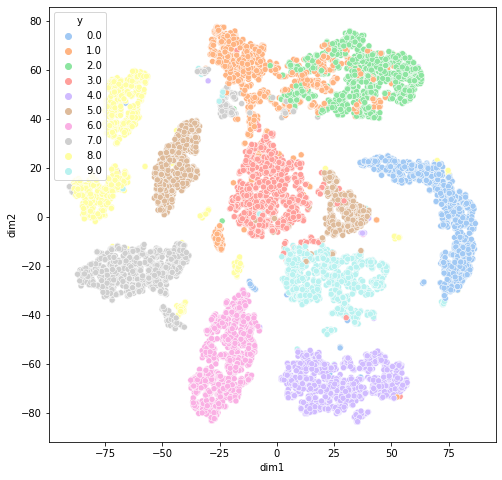

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_tsne, hue='y', x='dim1', y='dim2', palette='pastel')
plt.show()